<a href="https://colab.research.google.com/github/franklinperseuDS/trabalhomodulo02/blob/master/Trabalho01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de programação em ciência de dados modulo 02 dos alunos : Felipe Brasil Guimarães e Franklin Perseu de Lima e Lima

# Devem apresentar um resumo (sumário) com as estat´ısticas dos dados originais, ou seja, sem qualquer pr´e-processamento. A apresentação deste tipo de informação é relevante para que outras pessoas possam ter uma visão geral dos dados. As estat´ısticas podem ser apresentadas atrav´es de tabelas e/ou gr´aficos. http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz

###Coletando os dados para o trabalho

####instalando pacotes

In [ ]:
!pip install mplleaflet

  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-cp36-none-any.whl size=28555 sha256=fb6ff8775fd1171d186b7bc9b24a1ce7a696007c53608737108997cfa281d964
  Stored in directory: /root/.cache/pip/wheels/bf/fd/0b/0513de62c339c4a56e2234aa42a5d06e6660a4446fdae7b796
Successfully built mplleaflet


In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (68.7 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144617 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing trigge

In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 


####fazendo os imports.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import nltk
from nltk import sent_tokenize
import mplleaflet
import re




In [ ]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz

--2020-10-10 00:46:55--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz’

dados-curso-complet 100%[===================>] 136.70M  15.9MB/s    in 10s     

2020-10-10 00:47:06 (13.7 MB/s) - ‘dados-curso-completo.csv.tar.gz’ saved [143340808/143340808]



###Extraindo o arquivo gz
  

In [ ]:
import gzip
import shutil

with gzip.open('dados-curso-completo.csv.tar.gz', 'rb') as entrada:
    with open('dados-curso.csv', 'wb') as saida:
        shutil.copyfileobj(entrada, saida)

###adicionando os arquivos em um dataframe

In [ ]:
dados = pd.read_csv("/content/dados-curso.csv")

In [ ]:
dados = pd.DataFrame(dados)

In [ ]:
type(dados)

pandas.core.frame.DataFrame

###verificando a quantidade de linhas x colunas do Dataset

In [ ]:
dados.shape

(1658826, 13)

###Visualização dos Dados,os 5 primeiros  e os 5 últimos

In [ ]:
dados.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


###Quais e quantos Paises existem no Dataset

In [ ]:
dados.pais.describe()

In [ ]:
paises = dados.pais.unique()
print(paises)
print("Existem Cerca de ",len(paises)," paises")

[nan 'Brazil' 'Ireland' 'Portugal' 'Spain' 'Germany' 'Canada'
 'United States' 'Angola' 'Uganda' 'The Netherlands' 'Japan'
 'United Kingdom' 'Republic of Mozambique' 'Belgium'
 'Kingdom of Saudi Arabia' 'Venezuela' 'Pakistan' 'Indonesia' 'Chile'
 'Senegal' 'Argentina' 'Colombia' 'France' 'Turkey' 'Austria' 'Paraguay'
 'Italy' 'New Zealand' 'Kenya' "People's Republic of China" 'Panama'
 'Ghana' 'Ecuador' 'Haiti' 'Australia' 'Mexico'
 'Republic of the Philippines' 'Republic of Croatia' 'South Africa'
 'Denmark' 'India' 'Costa Rica' 'Nigeria' 'Malaysia' 'North Korea'
 'Uruguay' 'Cyprus' 'Egypt' 'Dominican Republic' 'Vietnam' 'Bahrain'
 'El Salvador' 'Switzerland' 'United Arab Emirates' 'Sri Lanka'
 'Cape Verde' 'Slovak Republic' 'Sweden' 'Israel' 'Honduras' 'Montenegro'
 'Thailand' 'Peru' 'Czech Republic' 'Luxembourg' 'Oman' 'Taiwan' 'Georgia'
 'Islamic Republic of Iran' 'Ivory Coast' 'Botswana' 'Ukraine' 'Lebanon'
 'Romania' 'Kazakhstan' 'East Timor' 'Bolivia' 'Macau' 'Norway' 'Cameroon'

In [ ]:
dados.pais.value_counts()

Brazil                  67247
Portugal                 2675
United States            1068
Italy                     484
Spain                     379
                        ...  
Andorra                     1
Republic of Slovenia        1
Monaco                      1
Madagascar                  1
Montenegro                  1
Name: pais, Length: 121, dtype: int64

###Quantos e quais idiomas existem no Dataset

In [ ]:
dados.idioma.describe()

count     1658825
unique         59
top            pt
freq      1586796
Name: idioma, dtype: object

In [ ]:
idiomas = dados.idioma.unique()
print(idiomas)
print("Existem ", len(idiomas), "idiomas no DataSET")

['pt' 'en' 'es' 'ar' 'tl' 'fr' 'und' 'nl' 'ja' 'cy' 'th' 'fa' 'it' 'de'
 'tr' 'eu' 'ca' 'ko' 'in' 'ht' 'lt' 'zh' 'hi' 'lv' 'sv' 'is' 'pl' 'ur'
 'sd' 'vi' 'no' 'te' 'cs' 'ta' 'da' 'ru' 'hu' 'ro' 'et' 'uk' 'el' 'sr'
 'fi' 'bn' 'iw' 'sl' 'bg' 'ne' 'am' 'ps' 'ml' 'gu' 'mr' 'or' 'ckb' 'si'
 'dv' 'my' 'kn' nan]
Existem  60 idiomas no DataSET


In [ ]:
dados.idioma.value_counts()

pt     1586796
en       23991
es       14255
it        6480
und       5656
ar        4579
fr        3656
ca        2600
tr        2296
ja        1955
in         948
th         890
tl         604
ko         544
hi         485
ru         417
de         361
pl         262
fa         258
nl         208
ur         179
ht         167
et         162
eu         116
el          94
lt          86
sv          84
cs          72
no          56
zh          51
da          45
ro          45
fi          44
cy          39
uk          37
lv          36
iw          36
ta          32
hu          26
vi          23
is          21
sr          20
sl          18
te          17
sd          12
ne          11
mr          10
bn          10
gu           7
ps           6
ckb          5
am           4
bg           4
ml           2
si           2
or           2
my           1
dv           1
kn           1
Name: idioma, dtype: int64

###Quais e quantas cidades existem no dataset

In [ ]:
cidades = dados.lugar.unique()
print(cidades)

print("Existem ",len(cidades), " locais no Dataset")

[nan 'Brasília' 'Macaé' ... 'Laranjeiras' 'BAIRRO DA CABANAGEM'
 'São José do Piauí']
Existem  4501  locais no Dataset


In [ ]:
dados.lugar.value_counts()


Rio de Janeiro    8443
Sao Paulo         7469
Brasília          2822
Porto Alegre      1866
Belo Horizonte    1764
                  ... 
Ravenna              1
San Martin           1
Westminster          1
Duran                1
Leme do Prado        1
Name: lugar, Length: 4500, dtype: int64

In [ ]:
dados.lugar.describe()

count              74605
unique              4500
top       Rio de Janeiro
freq                8443
Name: lugar, dtype: object

### saber quantas vezes foi retweetado

In [ ]:
sum(dados.retweet.value_counts())



1658825

In [ ]:
dados.seguidores.values

array([ 138.,   56.,    5., ..., 1000.,  726.,   nan])

In [ ]:
dados.seguidores.describe()

count    1.658825e+06
mean     3.257206e+04
std      3.680300e+05
min      0.000000e+00
25%      1.010000e+02
50%      3.800000e+02
75%      1.470000e+03
max      8.424125e+07
Name: seguidores, dtype: float64

##Verificar engajamento Geral (via Retweets)

Usuário e Texto com mais Retweet

In [ ]:
dados[dados['retweet']==dados['retweet'].max()]

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
728919,2020-05-21 22:45:41,Maryy,marisolcurcio13,RT @BTS_twt: Never Not 💜 https://t.co/Ag9oUTJvrN,1139763.0,8.0,en,NaN,NaN,NaN,NaN,NaN,[]


In [ ]:
dados['usuario'].loc[dados['retweet']==dados['retweet'].max()]

728919    Maryy
Name: usuario, dtype: object

In [ ]:
dados['texto'].loc[dados['retweet']==dados['retweet'].max()]

728919    RT @BTS_twt: Never Not 💜 https://t.co/Ag9oUTJvrN
Name: texto, dtype: object

Maiores engajamentos: Países com Retweets acima da média

In [ ]:
df = dados[dados['retweet']> dados['retweet'].median()]

In [ ]:
df['pais'].value_counts()

Brazil           12675
Portugal           654
United States      198
Italy              104
Spain               90
                 ...  
Kazakhstan           1
Tanzania             1
Switzerland          1
Guinea Bissau        1
Cyprus               1
Name: pais, Length: 70, dtype: int64

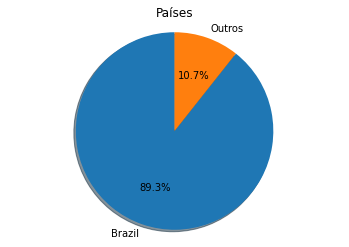

In [ ]:
tw_pais= df['pais'].value_counts().to_dict()

name = list(tw_pais.keys())
ky = list(tw_pais.keys())
vl = list(tw_pais.values())
v_bras = vl[0]
v_outros = sum(vl) - vl[0]

Grafico_pizza = {"Brazil" : v_bras, "Outros":v_outros}

nomes_gp = list(Grafico_pizza.keys())
valores_gp = list(Grafico_pizza.values())

fig1, ax1 = plt.subplots()
ax1.pie(valores_gp, labels=nomes_gp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Países")
plt.show()

## Ver engajamento no Brasil

In [ ]:
df = df[df['pais'] == 'Brazil']

In [ ]:
df['lugar'].value_counts().head(20)

Rio de Janeiro    1748
Sao Paulo         1652
Brasília           736
Porto Alegre       431
Recife             304
Belo Horizonte     301
Curitiba           288
Fortaleza          288
Belém              240
Salvador           220
Goiânia            194
São Luís           194
Manaus             185
Campinas           142
Aracaju            137
Natal              136
Niterói            130
João Pessoa        115
Macapá             111
Florianópolis      103
Name: lugar, dtype: int64

In [ ]:
df['lugar'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
rt=df['lugar'].value_counts().to_dict()

ky = list(rt.keys())
vl = list(rt.values())
plt.pie(vl, labels=ky)
plt.show()

###Verificar paises tweetaram em português

In [ ]:
d=dados['pais'].loc[dados.idioma == 'pt'].unique()
print(d)

[nan 'Brazil' 'Ireland' 'Portugal' 'Spain' 'Germany' 'Canada'
 'United States' 'Angola' 'Uganda' 'Japan' 'United Kingdom'
 'Republic of Mozambique' 'Venezuela' 'Pakistan' 'Indonesia' 'Chile'
 'Argentina' 'Austria' 'Paraguay' 'Italy' 'New Zealand' 'France' 'Kenya'
 "People's Republic of China" 'Panama' 'Ghana' 'Haiti' 'Australia'
 'Mexico' 'Republic of the Philippines' 'Republic of Croatia' 'Belgium'
 'South Africa' 'Denmark' 'India' 'North Korea' 'Colombia' 'Uruguay'
 'Cyprus' 'Dominican Republic' 'Vietnam' 'Bahrain' 'Ecuador' 'El Salvador'
 'The Netherlands' 'Switzerland' 'United Arab Emirates' 'Sri Lanka'
 'Cape Verde' 'Slovak Republic' 'Sweden' 'Honduras' 'Montenegro'
 'Thailand' 'Peru' 'Nigeria' 'Czech Republic' 'Turkey' 'Luxembourg'
 'Taiwan' 'Senegal' 'Kingdom of Saudi Arabia' 'Botswana' 'Romania'
 'Israel' 'Malaysia' 'East Timor' 'Macau' 'Norway' 'Singapore' 'Ukraine'
 'Bolivia' 'Qatar' 'Democratic Republic of Congo' 'Estonia' 'Curaçao'
 'Russia' 'Bahamas' 'Republic of Korea' 'N

Verificar a localização utilizando as coordenadas de Latitude /  Longitude

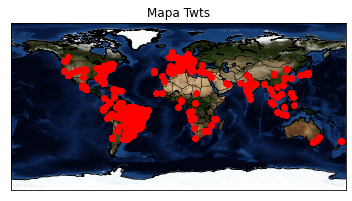

In [ ]:
# esse ta rodando correto m = Basemap(projection= 'mill',llcrnrlat = -90, llcrnrlon = -180, urcrnrlat = 90, urcrnrlon= 180, resolution='h' )
# esse não consegui fazer funcionarm = Basemap(width=12000000,height=9000000,projection='lcc',resolution=None,lat_0=0,lon_0=0)
#projection = 'mill' originalmente
#resolution = 'c','l','i','h' or 'f'
m = Basemap()
m.drawcoastlines()
m.drawcountries()
#m.drawstates() 
m.bluemarble() #adiciona os oceanos


m.plot(dados['latitude'],dados['longitude'], 'ro')



plt.title("Mapa Twts")
plt.show()


In [ ]:
"""df = dados[(dados['latitude'].notnull()) & (dados['longitude'].notnull())]
plt.scatter(df['longitude'],df['latitude'], marker='.')
mplleaflet.display()"""

"df = dados[(dados['latitude'].notnull()) & (dados['longitude'].notnull())]\nplt.scatter(df['longitude'],df['latitude'], marker='.')\nmplleaflet.display()"

####gráfico para ver os paises.


In [ ]:
paises = dados.pais.unique()
df = dados.loc[dados['pais'] == 'Brazil']
tweets_pais = dados.pais.value_counts()

In [ ]:
tweets_pais = tweets_pais.dropna()

In [ ]:
tweets_dicts = tweets_pais.to_dict()

In [ ]:
print(tweets_dicts)

{'Brazil': 67247, 'Portugal': 2675, 'United States': 1068, 'Italy': 484, 'Spain': 379, 'United Kingdom': 323, 'France': 218, 'Argentina': 193, 'Republic of Mozambique': 167, 'Canada': 152, 'Ireland': 150, 'Germany': 133, 'Japan': 91, 'Angola': 84, 'India': 79, 'Mexico': 76, 'Chile': 73, 'Paraguay': 55, 'Australia': 50, 'Colombia': 48, "People's Republic of China": 47, 'Belgium': 43, 'The Netherlands': 41, 'Turkey': 40, 'Switzerland': 37, 'South Africa': 36, 'Ecuador': 32, 'Kingdom of Saudi Arabia': 31, 'Uruguay': 31, 'Nigeria': 30, 'Venezuela': 28, 'New Zealand': 28, 'Austria': 27, 'Slovak Republic': 20, 'Indonesia': 20, 'Republic of the Philippines': 18, 'Peru': 18, 'Sweden': 16, 'Denmark': 13, 'Ghana': 12, 'Pakistan': 11, 'Dominican Republic': 11, 'Bolivia': 11, 'El Salvador': 11, 'Panama': 11, 'United Arab Emirates': 11, 'Egypt': 10, 'Malaysia': 9, 'Cape Verde': 9, 'Kenya': 8, 'Kuwait': 7, 'Czech Republic': 7, 'Uganda': 7, 'Israel': 6, 'Bahrain': 6, 'Thailand': 6, 'Romania': 5, 'Rus

In [ ]:
names = list(tweets_dicts.keys())

In [ ]:
values = list(tweets_dicts.values())

In [ ]:
values_brasil = values[0]
print(values_brasil)

67247


In [ ]:
for i in range(len(values)):
      values_outros = sum(values)
values_outros = values_outros - values[0]
print(values_outros)

Grafico_pizza = {"Brazil" : values_brasil, "Outros":values_outros}
 

7353


In [ ]:
print(Grafico_pizza)
nomes_gp = list(Grafico_pizza.keys())
valores_gp = list(Grafico_pizza.values())

{'Brazil': 67247, 'Outros': 7353}


In [ ]:
fig = plt.figure(figsize=(150,30))
ax = fig.add_axes([0,0,1,1])
ax.bar(names,values)
plt.show()

####Fazendo o gráfico em pizza

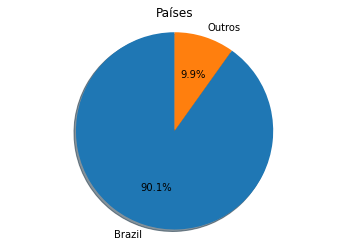

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
#sizes = [15, 30, 45, 10]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(valores_gp, labels=nomes_gp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Países")
plt.show()

####Gráfico para ver os idiomas


In [ ]:
idioma = dados.idioma.value_counts()

In [ ]:
idioma = idioma.to_dict()

In [ ]:
idioma

{'am': 4,
 'ar': 4579,
 'bg': 4,
 'bn': 10,
 'ca': 2600,
 'ckb': 5,
 'cs': 72,
 'cy': 39,
 'da': 45,
 'de': 361,
 'dv': 1,
 'el': 94,
 'en': 23991,
 'es': 14255,
 'et': 162,
 'eu': 116,
 'fa': 258,
 'fi': 44,
 'fr': 3656,
 'gu': 7,
 'hi': 485,
 'ht': 167,
 'hu': 26,
 'in': 948,
 'is': 21,
 'it': 6480,
 'iw': 36,
 'ja': 1955,
 'kn': 1,
 'ko': 544,
 'lt': 86,
 'lv': 36,
 'ml': 2,
 'mr': 10,
 'my': 1,
 'ne': 11,
 'nl': 208,
 'no': 56,
 'or': 2,
 'pl': 262,
 'ps': 6,
 'pt': 1586796,
 'ro': 45,
 'ru': 417,
 'sd': 12,
 'si': 2,
 'sl': 18,
 'sr': 20,
 'sv': 84,
 'ta': 32,
 'te': 17,
 'th': 890,
 'tl': 604,
 'tr': 2296,
 'uk': 37,
 'und': 5656,
 'ur': 179,
 'vi': 23,
 'zh': 51}

In [ ]:
idiomaChave = idioma.keys()
idiomaValues = idioma.values()

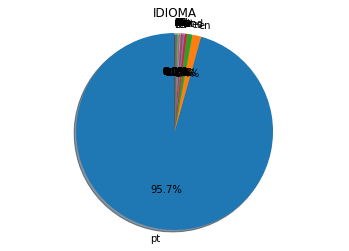

In [ ]:
#Gráfico em Pizza para os idiomas
fig1, ax1 = plt.subplots()
ax1.pie(idiomaValues, labels=idiomaChave, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("IDIOMA")
plt.show()

##2. As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.Essa coleção de perguntas corresponde ao dataset "DuvidasDB". A seguir, a equipe deve apresentar as estat´ısticas sobre esses dados.

dados.texto.str.contains('?')

In [ ]:
dados.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0.0,56.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0.0,5.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0.0,124.0,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]


#### Criando o DuvidasDB .


In [ ]:

nltk.download('punkt')

df = dados.loc[dados['texto'].str.contains('?', regex=False) == True]
df

####duvidasDB

In [ ]:
df = dados.loc[dados['texto'].str.contains('?', regex=False) == True]
df.head()

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,pt,NaN,NaN,NaN,NaN,NaN,[]
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0.0,219.0,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,pt,NaN,NaN,NaN,NaN,NaN,[]


limpando nan

In [ ]:
df.dropna(how='all')

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
38,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,pt,NaN,NaN,NaN,NaN,NaN,[]
45,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0.0,219.0,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
57,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658795,2020-03-24 23:50:14,solineuza da diarista,gtstayhigh,E ai quem são vcs durante a quarentena? \n\nEu...,0.0,1329.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658810,2020-03-26 21:43:24,Chris CP,Chris_CP_,"@0n3p1ece @alexmono Oh jumentinha, 1918 é isso...",0.0,34.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658818,2020-05-25 22:53:13,O que houve com a couve?,couveluiza,@BiologiaBraba @Tati_Cordeiro Só vontade ou vo...,0.0,1883.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0.0,361.0,pt,NaN,NaN,NaN,NaN,NaN,[]


Organizar Index

In [ ]:
x = []
for i in range(len(df)):
  x.append(i)

In [ ]:
df.index = pd.Index(x)
df.head(10)

,dados-curso-completo.csv,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0.0,138.0,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0.0,1885.0,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-06-25 11:09:19,Andreia Peraro,AndreiaPeraro,@ipratesMD @dr_pampers Será que corremos o ris...,0.0,86.0,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-06 15:44:36,Diorgenes Pandini,diorpandini,Prioridade ?!\n\n #COVID19 #floripa #isolament...,0.0,219.0,pt,NaN,NaN,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']"
4,2020-03-30 00:43:36,Valnei do Val,vdoval,"Que tal uma notícia boa, indo na contramão do ...",0.0,201.0,pt,NaN,NaN,NaN,NaN,NaN,[]
5,2020-04-07 23:19:44,Mauricio Ligabo,LigaboMauricio,@JoseMedeirosMT Seria isso algum tipo aleatóri...,0.0,23.0,pt,NaN,NaN,NaN,NaN,NaN,[]
6,2020-04-13 19:16:51,Gus,arrombagus,"""Nova York é o novo epicentro da pandemia de c...",3.0,253.0,pt,Santos,Brazil,BR,NaN,NaN,[]
7,2020-05-15 18:15:33,Silveacyr Maria Coelho Santos,silveacyr,@mitags Será por que o Bolsonaro não fez propa...,0.0,67.0,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-04-08 22:04:51,lulleitao,lulleitao,@JeanSCorrea7 Mas ele não deu a entender que o...,0.0,2315.0,pt,NaN,NaN,NaN,NaN,NaN,[]
9,2020-04-02 13:04:55,Luizcarlosdospatetas@hotmail.com,Luizcarlosdosp5,#perguntacorona \nQuero saber se a covid tem c...,0.0,0.0,pt,NaN,NaN,NaN,NaN,NaN,['perguntacorona']


Criar o duvidasDB a partir do df

In [ ]:
duvidasDB = pd.DataFrame(columns=['duvida','id_df','doença','medicamento','organizacao','pessoa','outro'])

funçao de inserir uma linha no novo dataframe (link: https://pt.stackoverflow.com/questions/319032/como-inserir-uma-linha-em-um-dataframe-pandas-no-meio-de-outras-linhas)

In [ ]:
def inserir_linha(idx, dfx, df_inserir):
    dfA = dfx.iloc[:idx, ]
    dfB = dfx.iloc[idx:, ]

    dfx = dfA.append(df_inserir).append(dfB).reset_index(drop = True)

    return dfx


Inserir duvidasDB

In [ ]:
#Código para Gerar o Duvidas DB 
for i in range(len(df["texto"])):
  aux = []
  vet=[]
  t = df['texto'][i]
  x=re.split(r'[#.\n]\s*', t)
  for j in range(len(x)):
    cop = x[j]
    y= cop.find("?")
    if(y != -1):
      cop = cop[0:y+1]
      aux.append(cop)
       
  for w in range(len(aux)): 
    d_iserido = d = {'duvida': [aux[w]], 'id_df': [i]}
    df_iserido = pd.DataFrame(data = d_iserido)
    duvidasDB = inserir_linha(cont, duvidasDB, df_iserido) 
    cont+=1 

In [ ]:
duvidasDB.head(1000)

#Criando Dicionário

In [ ]:
dictDoenca = {1:['covid','coronavirus','covid19','covid-19','covid 19','coronavírus','corona virus','corona vírus'],2:'gripe',3:['pneumonia','respiração','problemas respiratorios'],4:['pandemia','pandemic','surtos','surto']}

In [ ]:
dictMedicamento = {1:'chá',2:'anita',3:'dorflex',4:['cloroquina','hidroxocloroquina'],5:'vacina',6:'azitromicina',7:'vitamina c',8:'zinco',9:'vitamina d',10:['ozonio','ozônio']}

In [ ]:
dictOrganizacao = {1:["china","governo chinês","comunismo",'comunista'],2:['brasil',"brazil"],3:['europa','italia'],4:["estados unidos","eua"],5:"onu",6:"oms",7:["mídia",'midia','@jornaloglobo','@globonews','@revistaistoe','@revistaepoca','@revistacruzoe','@revistaterca','@folha','@veja','@estadao'],8:'congresso',9:['governador','prefeito','governadores','prefeitos','autoridade','autoridades']}

In [ ]:
dictPessoa = {1:['bolsonaro','bozo','boso','bilorilo','bonoro','presidente do brasil','@jairbolsonaro'],2:['@donaldtrump','donald','trump','presidente americano'],3:'Tedros ',4:['minSaude','ministro da saude','ministro da saúde','teich','nelson','@lhmandetta','@teichnelson'],5:'infectologista',6:['@felipeneto','felipe neto','felipefeto','felipe feto']}

In [ ]:
dictOutros = {1:'prioridades',2:'terror',3:'cura',4:'morte',5:'genocida',6:'transmissão',7:'grupo de risco',8:'distanciamento',9:'teste rapido',10:'isolamento',11:'lockdown',12:'quarentena',13:'aglomeração',14:'abertura',15:'economia',16:'fome',17:['auxilio','coronavoucher','600 reais'],18:['mascara','máscara','mask'],19:['imunidade','imune'],20:'pulmão',21:['aumento','queda'],22:['idoso','velho','acima de'],22:['morte','mortes']}

#Persistencia dos Dados

In [ ]:
#Transformar o duvidasDB em um arquivo de CSV
#duvidasDB.to_csv('dvds.csv')

In [ ]:
#Copiar o arquivo CSV para o google Drive
#!cp dvds.csv "/content/drive/Shared drives/trabalhomodulo2/"

link para usar o arquivo duvidasDB(dvds.csv) 
https://drive.google.com/file/d/1-2zjExHLOhDa26ZsVRwtOZKFPX1Isu_c/view?usp=sharing

#Ler .csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
duvidasDB = pd.read_csv('/content/drive/Shared drives/trabalhomodulo2/dvds.csv')

In [ ]:
duvidasDB = pd.DataFrame(duvidasDB)


#Preencher DuvidasDB

In [ ]:
def preencherbanco(dicionario,coluna):
  for i in range(len(duvidasDB)): 
    verificador = False 
    aux = []
    vet=[]
    t = duvidasDB['duvida'][i]
    t =  t.lower()
    x = re.split(r'[#. \n?]\s*',t)
    for j in range(len(x)):
      cop = x[j]
      #y= cop.find("?")
      for w in range(len(dicionario)):
        w=w+1      
        if type(dicionario[w]) == str:
          if cop == dicionario[w]:
            verificador = True
            chave = w#valor da chave
        elif type(dicionario[w]) == list : #verifica se eh uma lista
          if cop in dicionario[w]:# verifica esta dentro da lista [covid, c19]
            verificador = True
            chave = w
    if verificador:    
      duvidasDB[coluna][i] = chave

####Doença

In [ ]:
preencherbanco(dictDoenca,'doença')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


####Medicamento

In [ ]:
preencherbanco(dictMedicamento,'medicamento')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


####organizaçao

In [ ]:
preencherbanco(dictOrganizacao,'organizacao')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


####Pessoa

In [ ]:
preencherbanco(dictPessoa,'pessoa')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


####Outro

In [ ]:
preencherbanco(dictOutros,'outro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#trabalhando em cima do duvidas e do df



In [ ]:
#Renomear a coluna data para o nome data
df.rename(columns={'dados-curso-completo.csv':'datas'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
duvidasDB.head(3)

,Unnamed: 0,duvida,id_df,doença,medicamento,organizacao,pessoa,outro
0,0,@BolsonaroSP Cade o fundão deputado?,0,NaN,NaN,NaN,NaN,NaN
1,1,Fumaça de cigarro pode propagar coronavírus?,1,1.0,NaN,NaN,NaN,NaN
2,2,@ipratesMD @dr_pampers Será que corremos o ris...,2,NaN,NaN,NaN,NaN,NaN


In [ ]:
duvidasDB.rename(columns={'id_df': 'IDdf'}, inplace=True)

In [ ]:
df.columns

In [ ]:
duvidasDB.columns

In [ ]:
x = []
for i in range(len(df)):
  x.append(i)


In [ ]:
df['IDdf'] = x


In [ ]:
duvidasDB.rename(columns={'id_df': 'IDdf'}, inplace=True)

In [ ]:
tab = pd.merge(df, duvidasDB, on='IDdf')

## 1- qual pais mais gerou duvidas?

###Gerando um dicionario para pegar os valores

In [ ]:
p = tab['pais'].value_counts()
kp = p.keys()
vp = p.values

###Gerando o gráfico em pizza 

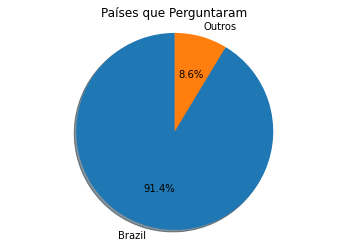

In [ ]:
v_bras = vp[0]
v_outros = sum(vp) - vp[0]

Grafico_pizza = {"Brazil" : v_bras, "Outros":v_outros}

nomes_gp = list(Grafico_pizza.keys())
valores_gp = list(Grafico_pizza.values())

fig1, ax1 = plt.subplots()
ax1.pie(valores_gp, labels=nomes_gp, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Países que Perguntaram")
plt.show()

## 2 - qual foi tema mais debatido no mundo e do brasil?

###criando variaveis para receber a soma do total de cada tema

In [ ]:
tabpessoas = sum(tab['pessoa'].value_counts())
labelpessoa= 'Pessoas :',tabpessoas

In [ ]:
tabdoencas = sum(tab['doença'].value_counts())
labeldoenca = 'Doenças :',tabdoencas

In [ ]:
tabmedicamento = sum(tab['medicamento'].value_counts())
labelmedicamento = 'Remédios:',tabmedicamento

In [ ]:
taborganizacao = sum(tab['organizacao'].value_counts())
labelorganizacao = 'Organizações: ',taborganizacao

In [ ]:
taboutro = sum(tab['outro'].value_counts())
labeloutro = 'Outros :',taboutro

###Gerando um gráfico em barra para um comparativo rápido

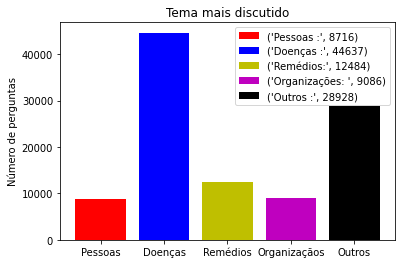

In [ ]:

plt.bar('Pessoas',[tabpessoas],width=0.8, label=labelpessoa, color='r')

plt.bar('Doenças',[tabdoencas],width=0.8, label=labeldoenca, color='b')

plt.bar('Remédios',[tabmedicamento],width=0.8, label=labelmedicamento, color='y')

plt.bar('Organizaçãos',[taborganizacao],width=0.8, label=labelorganizacao, color='m')

plt.bar('Outros',[taboutro],width=0.8, label=labeloutro, color='k')

plt.legend()

plt.xlabel('')
plt.ylabel('Número de perguntas')

plt.title('Tema mais discutido')

plt.show()


qual tema mais debatido mes a mes?
quem foi o mais citado mes a mes?

In [ ]:
import datetime

In [ ]:
tab['datas'] = pd.to_datetime(tab['datas'], format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
meses = []

In [ ]:
for i in range(len(tab)):
  meses.append(tab['datas'][i].month)

In [ ]:
tab['mes'] = meses

In [ ]:
tab.rename(columns={'meses': 'mes'}, inplace=True)

In [ ]:
def plotar(dicionario,barras,i):
  
  med = tab.groupby(['mes'])[barras].value_counts()
  ind =med.keys().get_level_values(0).unique()
  x = med[ind[i]]
  fig = plt.figure(figsize=(10,5))
  chave = list(x.keys())
  rotulo = []
  
  for j in range(len(chave)):
    if type(dicionario[chave[j]]) == str:
      rotulo.append(dicionario[chave[j]])
    else:
      rotulo.append(dicionario[chave[j]][0])
  plt.bar(rotulo,x.values, label=rotulo,width= 0.8)
  #plt.pie(x.values, labels=x.keys() ,autopct='%1.1f%%',shadow=True, startangle=90)
  nomegrafico = print('tabela',barras,'do mês',ind[i])
  plt.title(nomegrafico)

  plt.show()

####Doença

tabela doença do mês 1


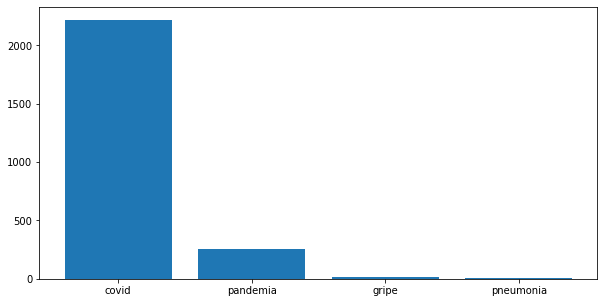

tabela doença do mês 2


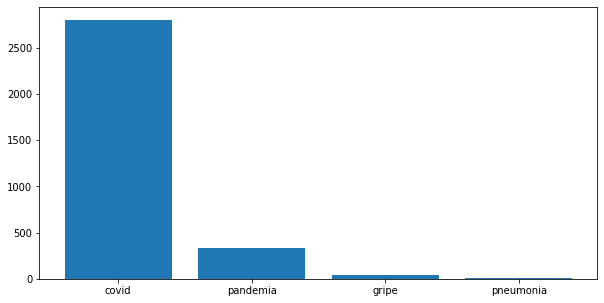

tabela doença do mês 3


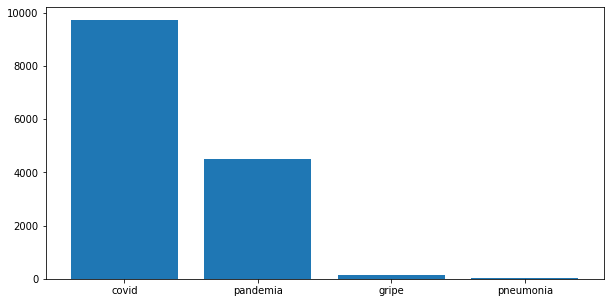

tabela doença do mês 4


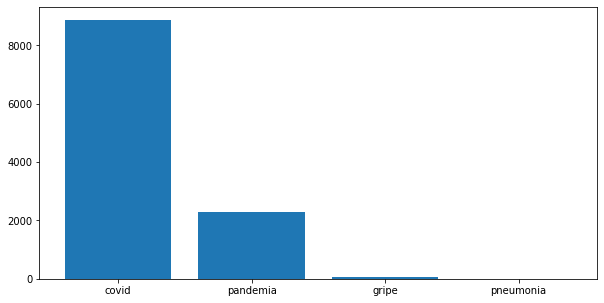

tabela doença do mês 5


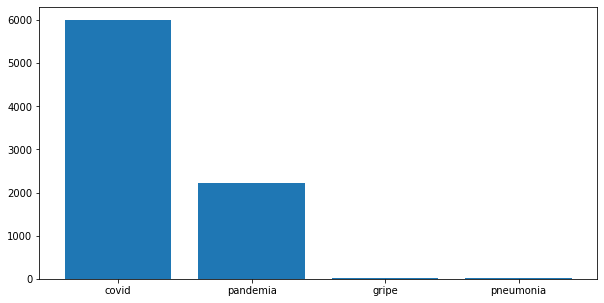

tabela doença do mês 6


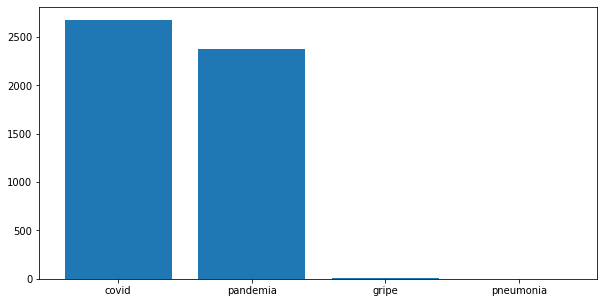

In [ ]:
for i in range(6):
  plotar(dictDoenca,'doença',i)

####Medicamento

tabela medicamento do mês 1


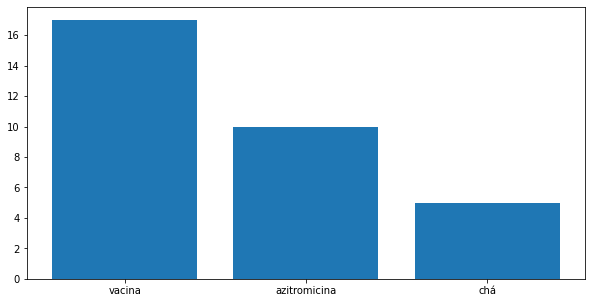

tabela medicamento do mês 2


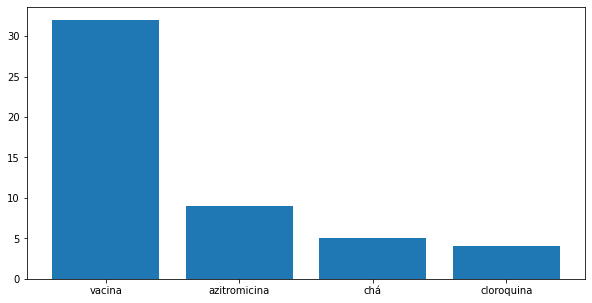

tabela medicamento do mês 3


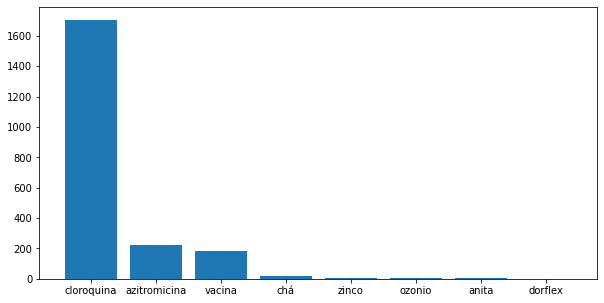

tabela medicamento do mês 4


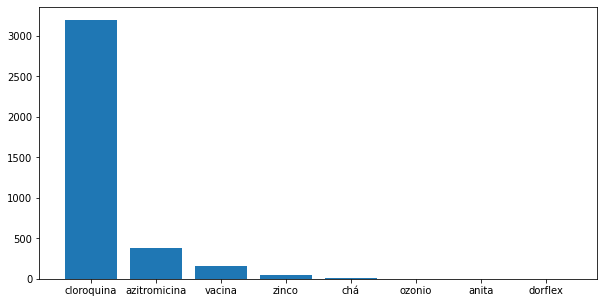

tabela medicamento do mês 5


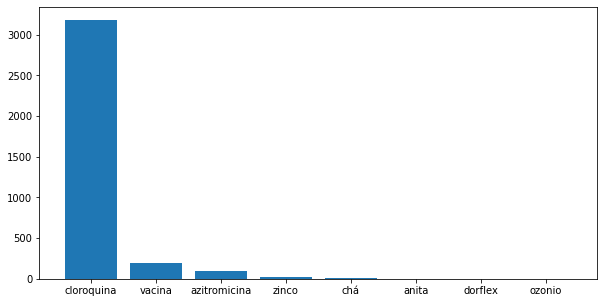

tabela medicamento do mês 6


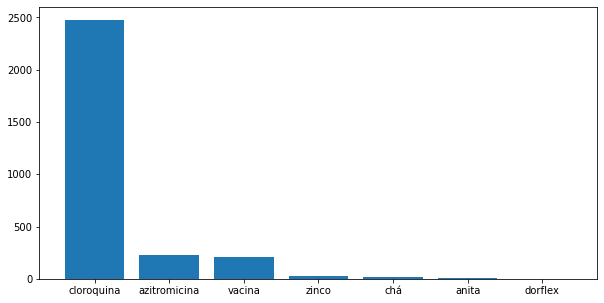

In [ ]:
for i in range(6):
  plotar(dictMedicamento,'medicamento',i)

Organização

tabela organizacao do mês 1


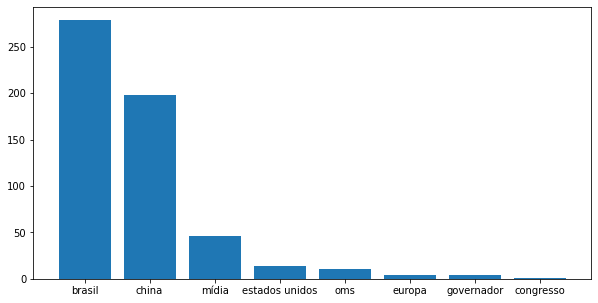

tabela organizacao do mês 2


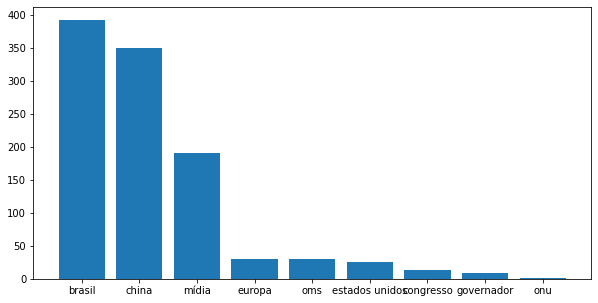

tabela organizacao do mês 3


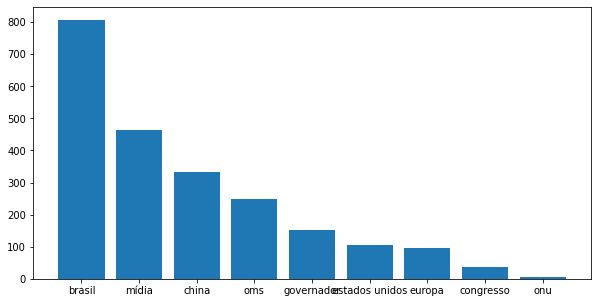

tabela organizacao do mês 4


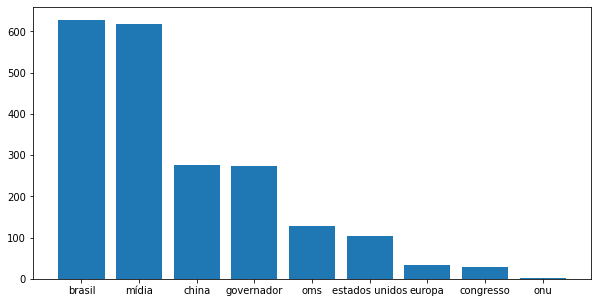

tabela organizacao do mês 5


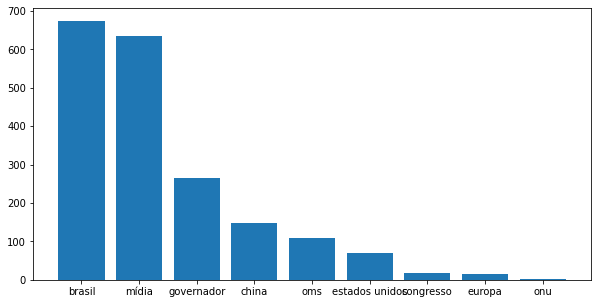

tabela organizacao do mês 6


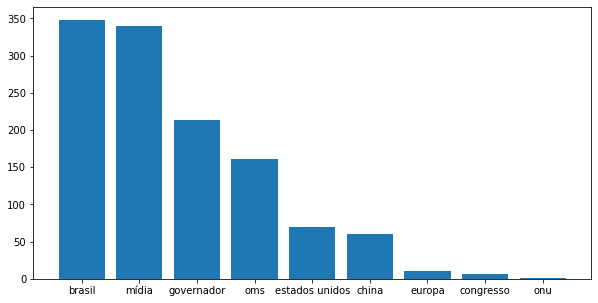

In [ ]:
for i in range(6):
  plotar(dictOrganizacao,'organizacao',i)

Pessoas

tabela pessoa do mês 1


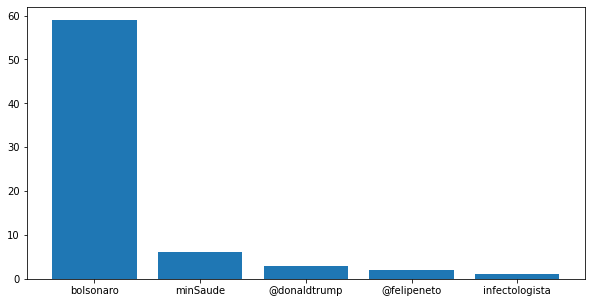

tabela pessoa do mês 2


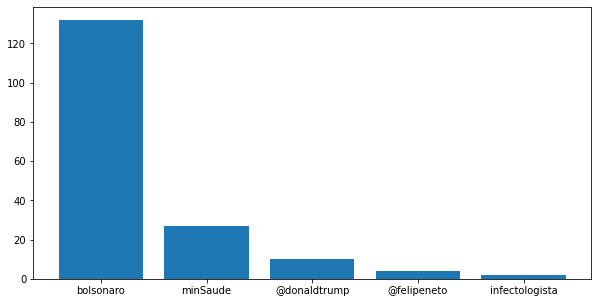

tabela pessoa do mês 3


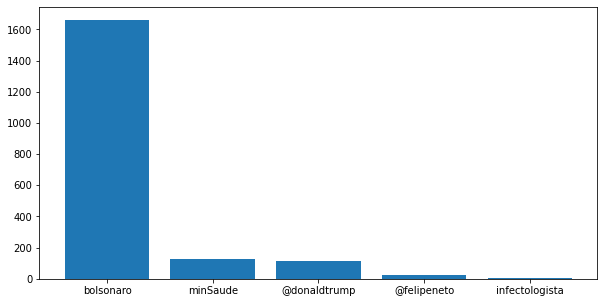

tabela pessoa do mês 4


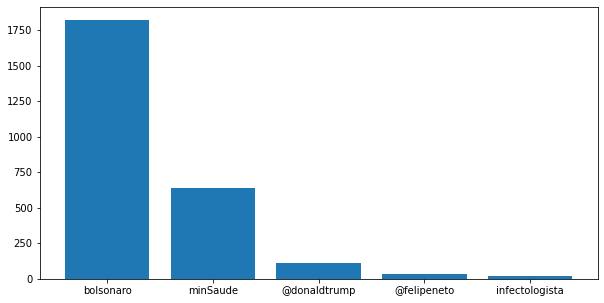

tabela pessoa do mês 5


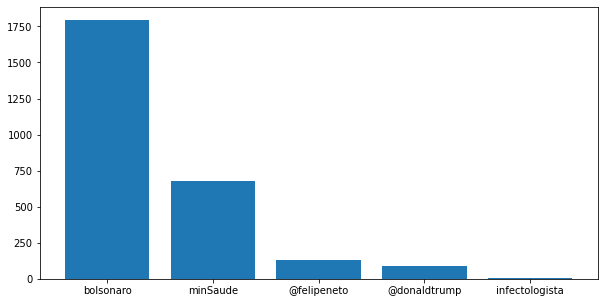

tabela pessoa do mês 6


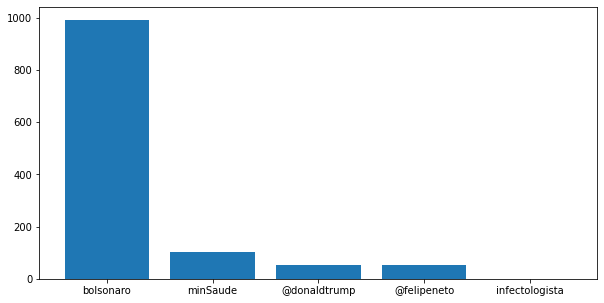

In [ ]:
for i in range(6):
  plotar(dictPessoa,'pessoa',i)

Outros

tabela outro do mês 1


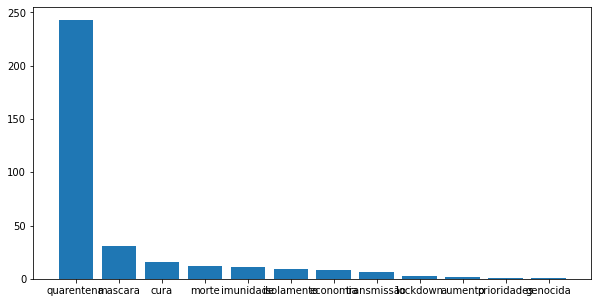

tabela outro do mês 2


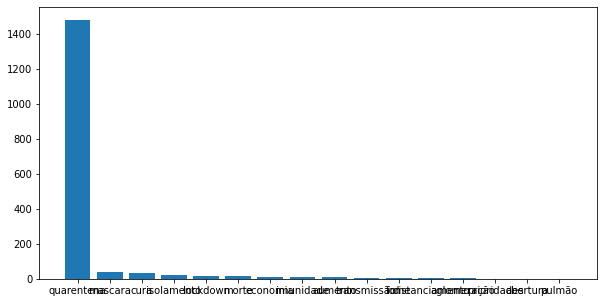

tabela outro do mês 3


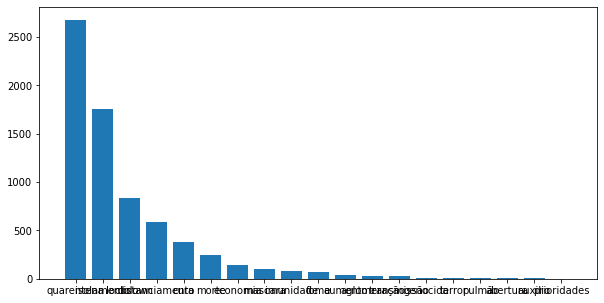

tabela outro do mês 4


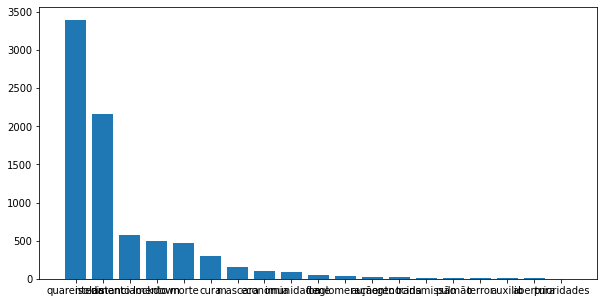

tabela outro do mês 5


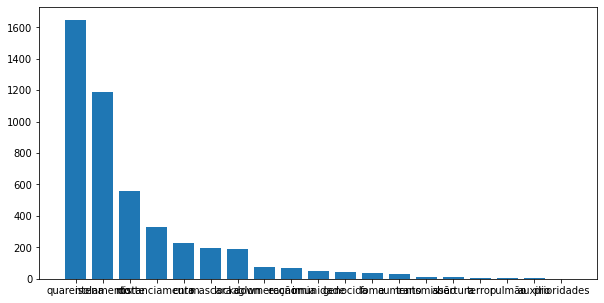

tabela outro do mês 6


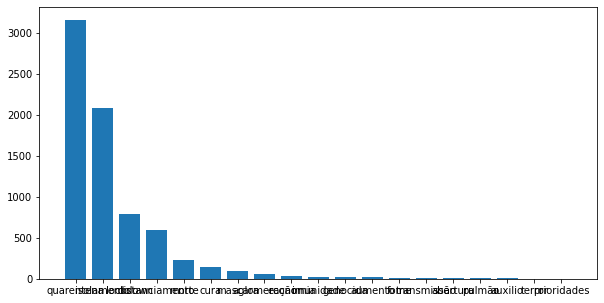

In [ ]:
for i in range(6):
  plotar(dictOutros,'outro',i)

###Mapa geográfico das perguntas

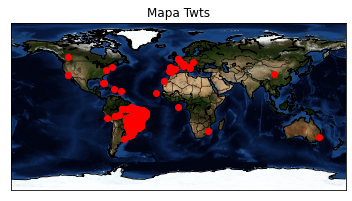

In [ ]:
m = Basemap()
m.drawcoastlines()
m.drawcountries()
#m.drawstates() 
m.bluemarble() #adiciona os oceanos


m.plot(tab['latitude'],tab['longitude'], 'ro')



plt.title("Mapa Tweets")
plt.show()